<a href="https://colab.research.google.com/github/LizcanoJuan1010/Machine-Learning-Projects/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller de Regresion:

#Juan José Lizcano Barbosa

##Objetivo:
El objetivo es realizar un pronóstico de ventas anual para la ropa de mujer basado en la información de las sucursales.

De gran importancia es saber si los recursos que se asignan tienen poder para modelar la demanda en las zonas respectivas.


PASOS:
1. Data Understandig
2. Analisis de suposiciones
    *  Normalidad de residuos
    * No autocorrelcion de residuos
    * Homoscedasticidad
    * Especificación de Vaibales independientes
    * puntos de influencia
3. Feature Selection
    * Modelo Preespecificado
    * Regresion por componentes principales
    * Stepwise, forward, backwoards
    * Regresion de crestas
    * Analisis de subgrupos
4. Calculo de metricas, AIC, BIC y R2 abj


#DATA UNDESTANDING

In [ ]:
install.packages("corrplot")
install.packages("lmtest")
install.packages("MASS")
install.packages("leaps")
install.packages("readxl")
install.packages("dplyr")
install.packages("mvnormtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’




In [ ]:
library(corrplot)
library(lmtest)
library(MASS)
library(leaps)
library(readxl)
library(ggplot2)
library(dplyr)
library(mvnormtest)

corrplot 0.95 loaded

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
regtecnica<-read_excel("/content/Train.xlsx")

str(regtecnica)

tibble [1,600 × 12] (S3: tbl_df/tbl/data.frame)
 $ idloc    : num [1:1600] 1648 1259 674 1558 1626 ...
 $ edadloc  : num [1:1600] 11 3 13 7 22 8 22 8 4 4 ...
 $ correo   : num [1:1600] 10042 11909 10669 6981 10940 ...
 $ paginas  : num [1:1600] 68 107 75 65 74 110 73 106 84 112 ...
 $ telefono : num [1:1600] 35 42 33 19 37 55 34 45 39 46 ...
 $ impresa  : num [1:1600] 22609 24562 38914 39205 23947 ...
 $ servicio : num [1:1600] 30 35 52 30 46 57 50 41 25 39 ...
 $ nomina   : num [1:1600] 66307 29107 9519 28651 30654 ...
 $ idmercado: num [1:1600] 8 8 4 7 7 7 8 3 7 9 ...
 $ tamamer  : chr [1:1600] "Grande" "Grande" "Median" "Grande" ...
 $ promo    : num [1:1600] 2 2 3 1 2 1 3 1 2 1 ...
 $ ropamujer: num [1:1600] 43748 37484 57523 50338 45676 ...


In [ ]:
test<-read_excel("/content/test.xlsx")

str(test)

tibble [400 × 12] (S3: tbl_df/tbl/data.frame)
 $ idloc    : num [1:400] 22 14 91 32 28 109 46 82 55 45 ...
 $ edadloc  : num [1:400] 3 18 5 20 8 15 11 11 7 5 ...
 $ correo   : num [1:400] 9115 8438 11890 9003 9152 ...
 $ paginas  : num [1:400] 65 82 92 54 91 88 80 87 66 88 ...
 $ telefono : num [1:400] 30 35 50 27 24 34 33 43 27 32 ...
 $ impresa  : num [1:400] 26496 20912 24474 33446 27235 ...
 $ servicio : num [1:400] 27 22 53 26 22 26 33 36 37 35 ...
 $ nomina   : num [1:400] 21936 25542 18591 23028 20214 ...
 $ idmercado: num [1:400] 2 1 9 2 2 2 4 8 5 4 ...
 $ tamamer  : chr [1:400] "Grande" "Grande" "Grande" "Grande" ...
 $ promo    : num [1:400] 3 2 1 3 3 1 1 2 2 1 ...
 $ ropamujer: num [1:400] 43748 37484 57523 50338 45676 ...


In [ ]:
test<-read_excel("/content/test.xlsx")

str(test)

tibble [400 × 12] (S3: tbl_df/tbl/data.frame)
 $ idloc    : num [1:400] 22 14 91 32 28 109 46 82 55 45 ...
 $ edadloc  : num [1:400] 3 18 5 20 8 15 11 11 7 5 ...
 $ correo   : num [1:400] 9115 8438 11890 9003 9152 ...
 $ paginas  : num [1:400] 65 82 92 54 91 88 80 87 66 88 ...
 $ telefono : num [1:400] 30 35 50 27 24 34 33 43 27 32 ...
 $ impresa  : num [1:400] 26496 20912 24474 33446 27235 ...
 $ servicio : num [1:400] 27 22 53 26 22 26 33 36 37 35 ...
 $ nomina   : num [1:400] 21936 25542 18591 23028 20214 ...
 $ idmercado: num [1:400] 2 1 9 2 2 2 4 8 5 4 ...
 $ tamamer  : chr [1:400] "Grande" "Grande" "Grande" "Grande" ...
 $ promo    : num [1:400] 3 2 1 3 3 1 1 2 2 1 ...
 $ ropamujer: num [1:400] 43748 37484 57523 50338 45676 ...


In [ ]:
columnas_numericas <- names(regtecnica)[sapply(regtecnica, is.numeric)]

#EDA

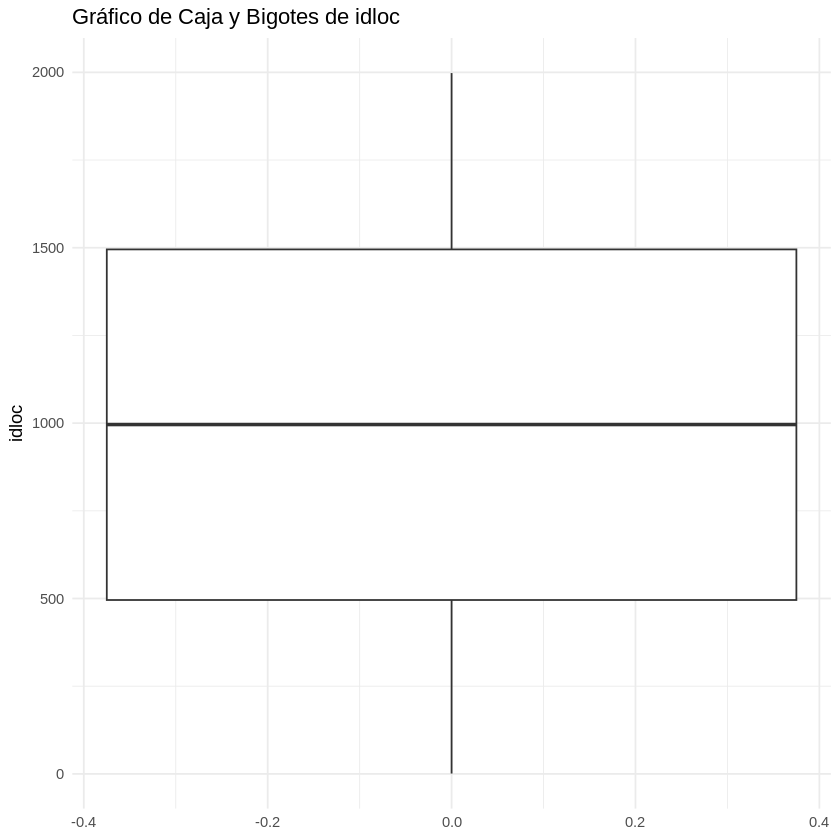

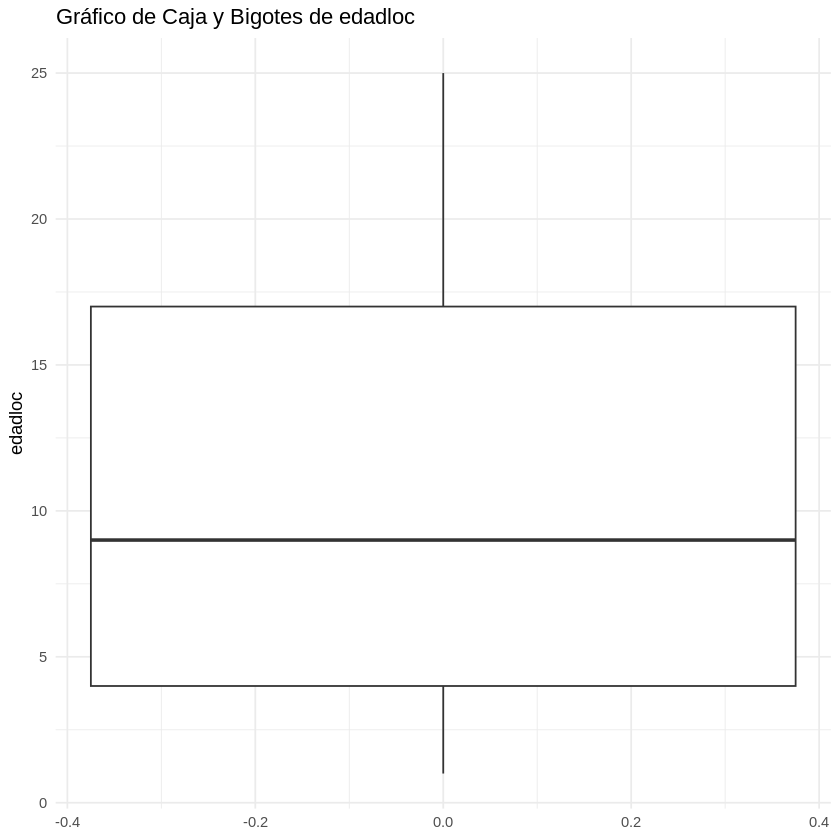

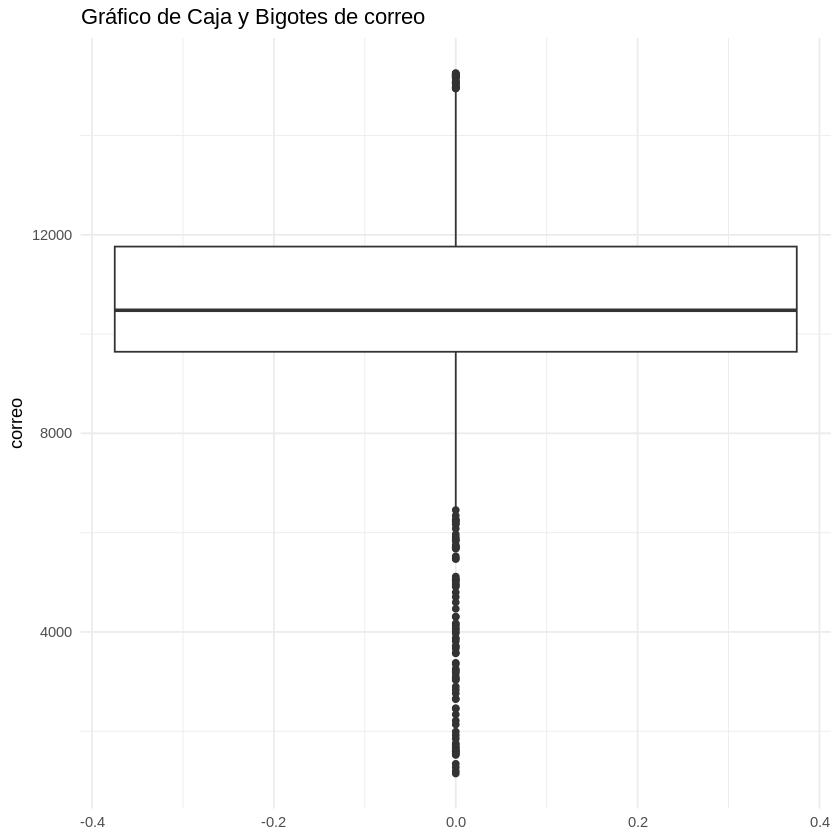

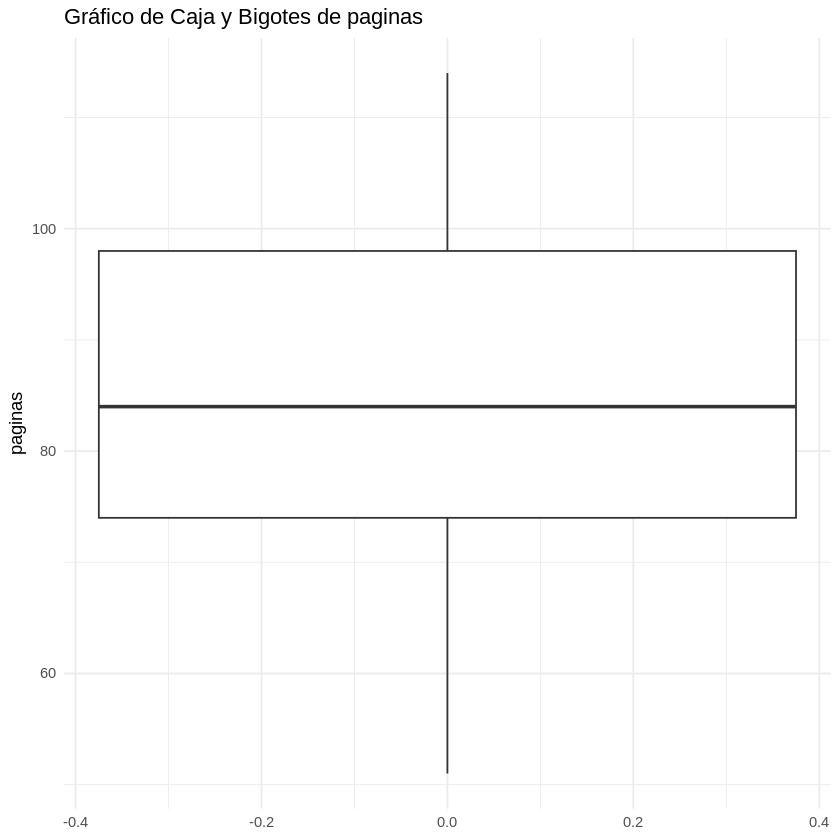

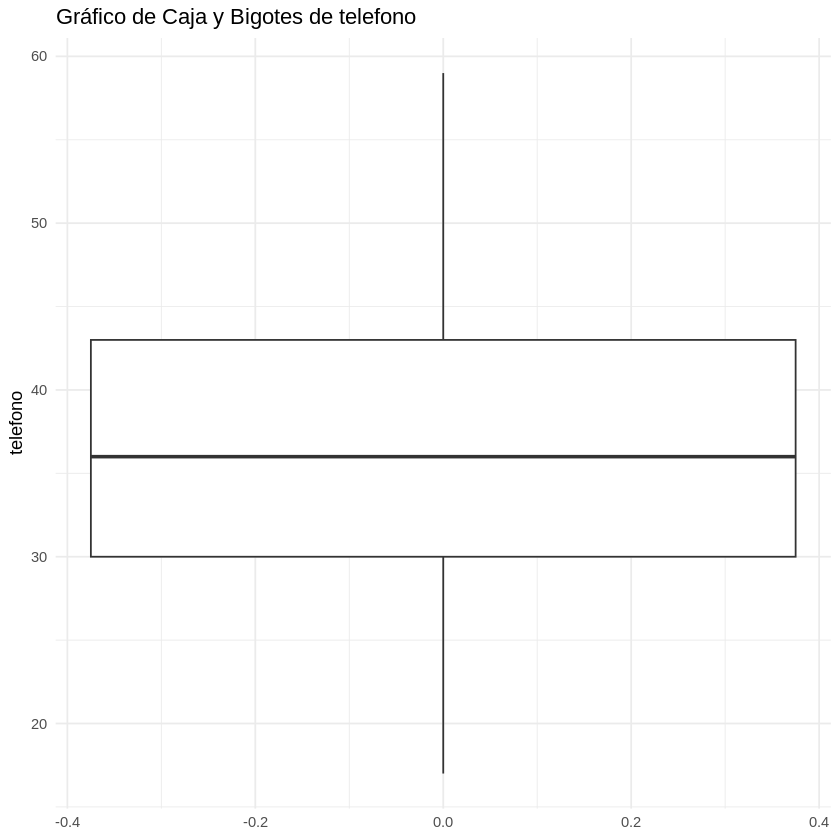

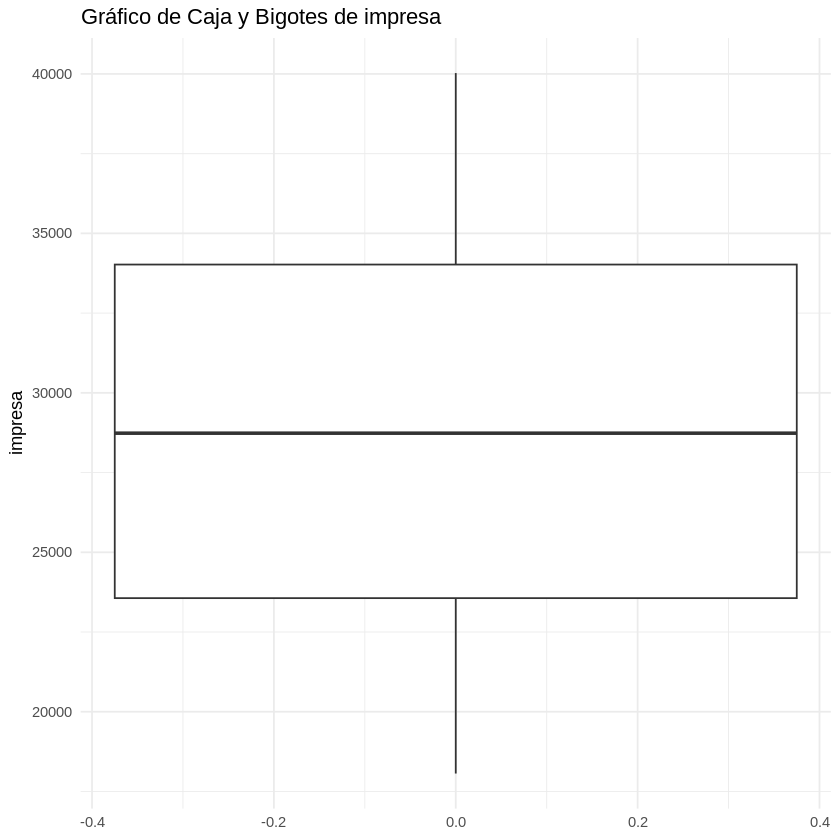

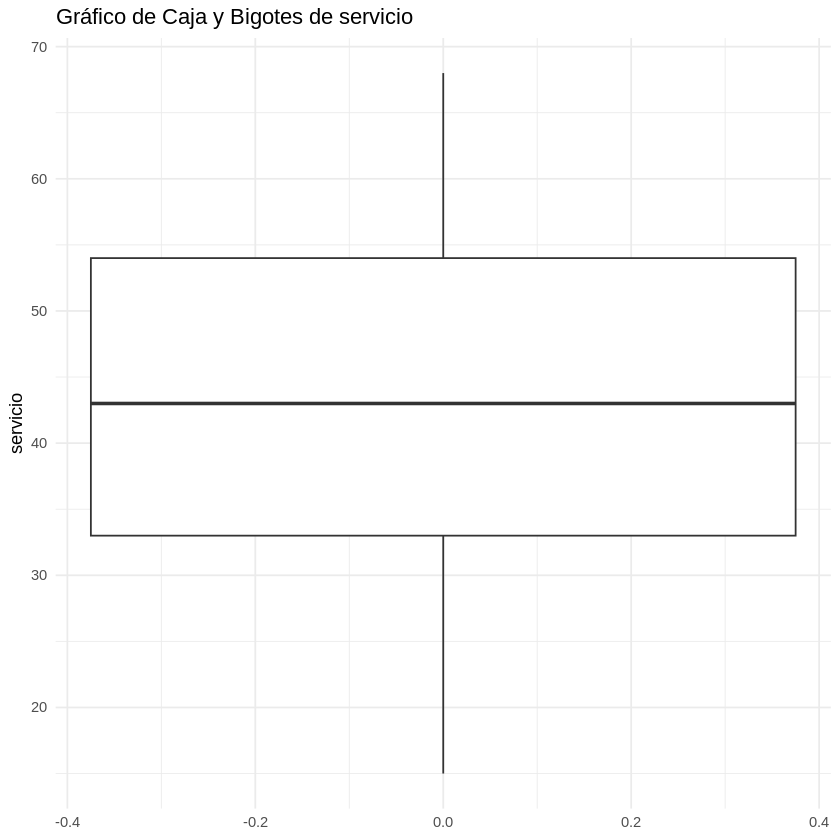

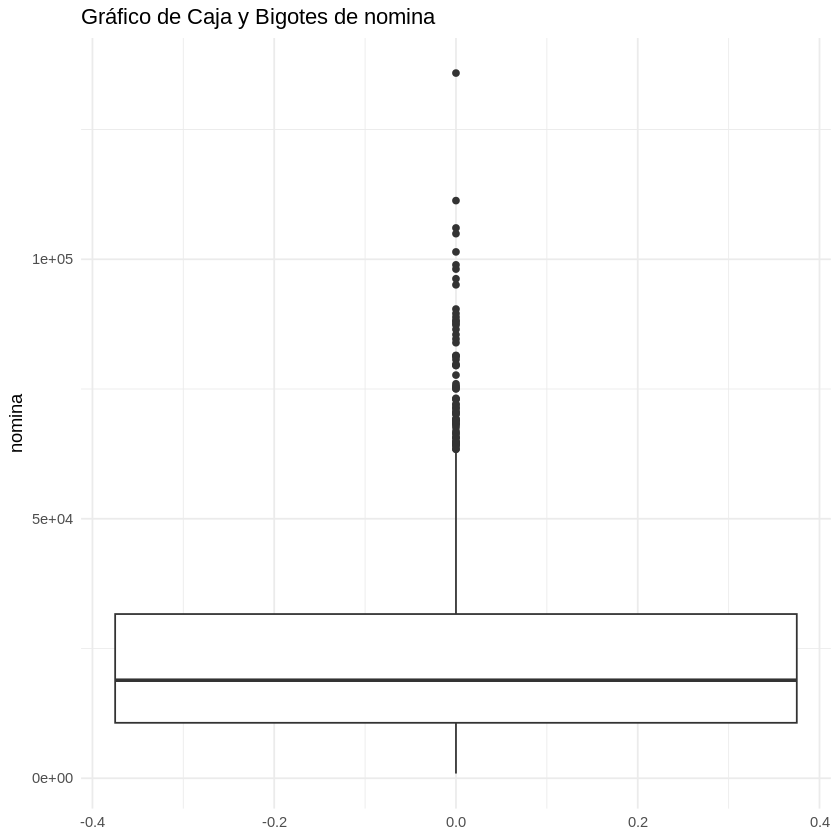

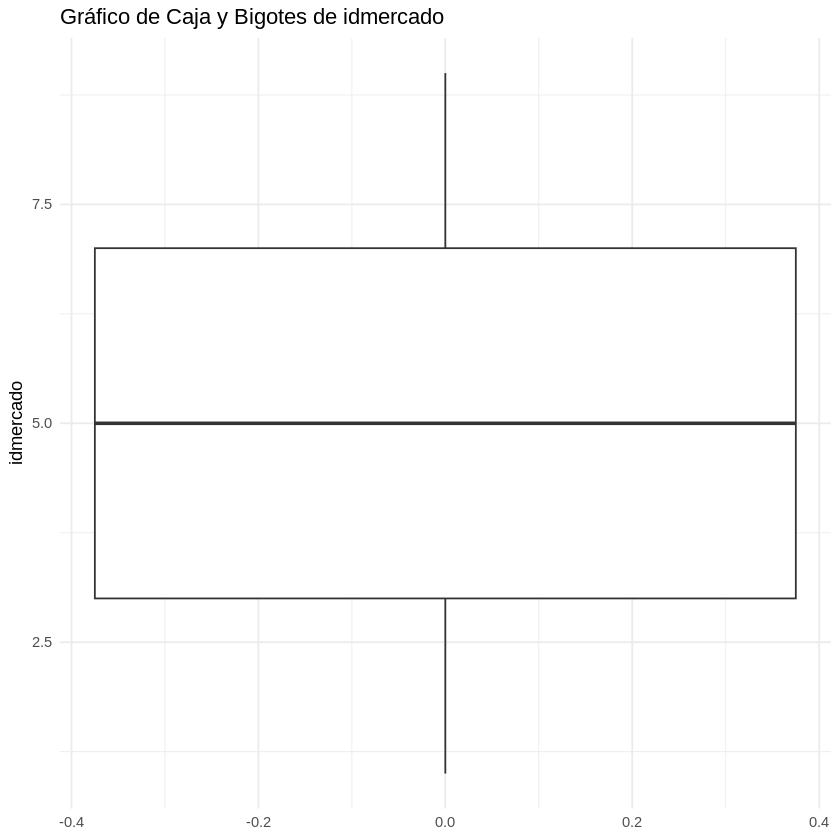

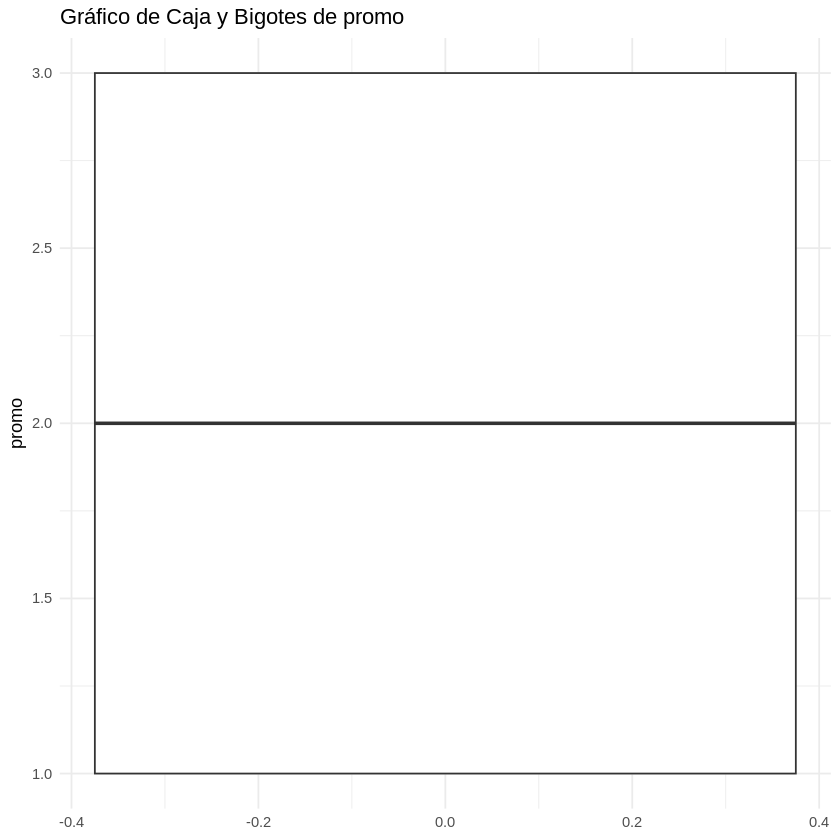

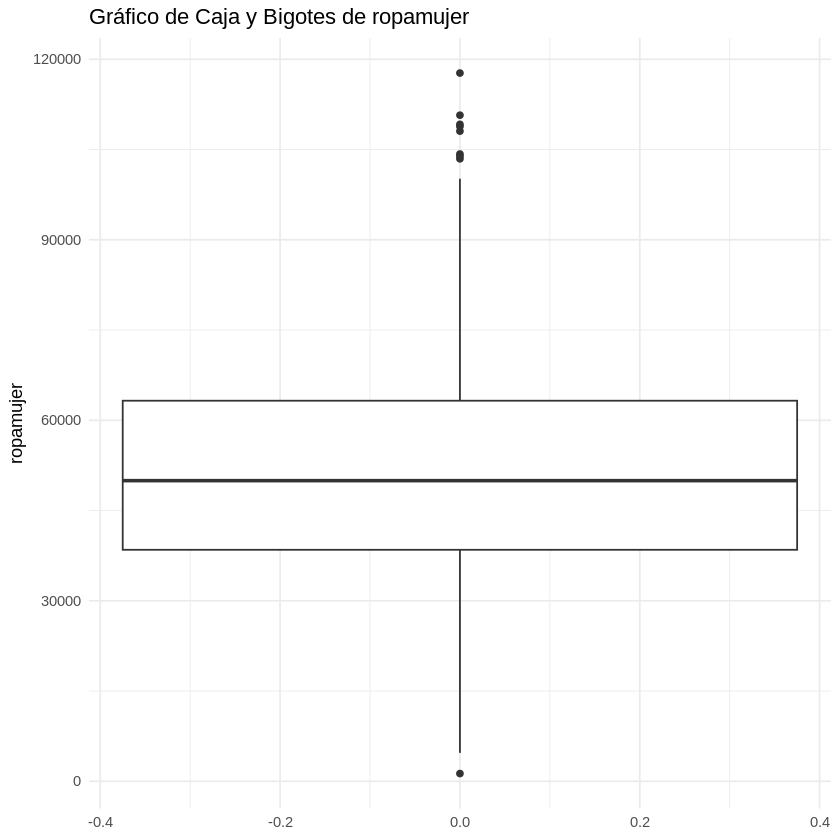

In [ ]:
for (col_num in columnas_numericas) {
    p <- ggplot(regtecnica, aes(y = .data[[col_num]])) +
      geom_boxplot() +
      labs(
        title = paste("Gráfico de Caja y Bigotes de", col_num),
        y = col_num
      ) +
      theme_minimal()
     print(p)
}

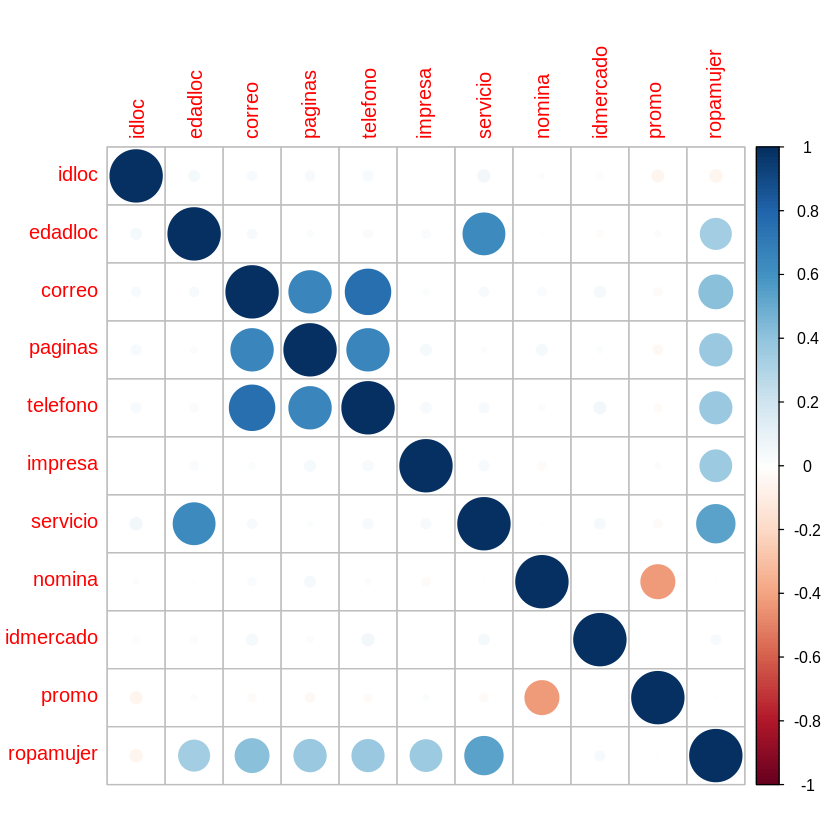

In [ ]:
matrizcor <- cor(regtecnica[, columnas_numericas]) # Subset the data using column names
corrplot(matrizcor)

###Las variables independientes telefono, paginas y correo parecen tener colinialidad

In [ ]:
summary(regtecnica)

     idloc           edadloc          correo         paginas      
 Min.   :   1.0   Min.   : 1.00   Min.   : 1147   Min.   : 51.00  
 1st Qu.: 495.8   1st Qu.: 4.00   1st Qu.: 9644   1st Qu.: 74.00  
 Median : 996.0   Median : 9.00   Median :10480   Median : 84.00  
 Mean   : 995.5   Mean   :10.47   Mean   :10599   Mean   : 85.04  
 3rd Qu.:1495.2   3rd Qu.:17.00   3rd Qu.:11764   3rd Qu.: 98.00  
 Max.   :1998.0   Max.   :25.00   Max.   :15259   Max.   :114.00  
    telefono        impresa         servicio         nomina      
 Min.   :17.00   Min.   :18061   Min.   :15.00   Min.   :   901  
 1st Qu.:30.00   1st Qu.:23562   1st Qu.:33.00   1st Qu.: 10680  
 Median :36.00   Median :28735   Median :43.00   Median : 18886  
 Mean   :37.64   Mean   :28835   Mean   :43.65   Mean   : 24104  
 3rd Qu.:43.00   3rd Qu.:34023   3rd Qu.:54.00   3rd Qu.: 31637  
 Max.   :59.00   Max.   :40028   Max.   :68.00   Max.   :135882  
   idmercado       tamamer              promo         ropamujer     


In [ ]:

library(psych)
describe(regtecnica)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
idloc,1,1600,995.531875,5.775364e+02,996.00,995.281250,741.3000,1.000,1998.00,1997.00,-0.00280265,-1.197196742,14.43840899
edadloc,2,1600,10.469375,7.385588e+00,9.00,9.960938,8.8956,1.000,25.00,24.00,0.46567276,-1.064169671,0.18463969
correo,3,1600,10598.675625,2.400669e+03,10480.00,10732.083594,1427.7438,1147.000,15259.00,14112.00,-0.96616773,2.730958977,60.01672079
paginas,4,1600,85.042500,1.593540e+01,84.00,85.301563,16.3086,51.000,114.00,63.00,-0.05145926,-0.731470600,0.39838495
telefono,5,1600,37.637500,9.745792e+00,36.00,37.153125,8.8956,17.000,59.00,42.00,0.41833603,-0.402011048,0.24364479
impresa,6,1600,28834.617337,6.251170e+03,28734.79,28782.094383,7737.0148,18061.200,40027.78,21966.58,0.05816093,-1.124923709,156.27925596
servicio,7,1600,43.651250,1.324152e+01,43.00,43.661719,14.8260,15.000,68.00,53.00,0.01362882,-0.827229117,0.33103810
nomina,8,1600,24104.131250,1.821735e+04,18886.50,21349.056250,14045.4111,901.000,135882.00,134981.00,1.54600075,2.928468428,455.43380068
idmercado,9,1600,4.925000,2.606458e+00,5.00,4.906250,2.9652,1.000,9.00,8.00,0.06829287,-1.245171308,0.06516144


#Pruebas sobre supuestos

In [ ]:
if (length(columnas_numericas) >= 3) {
  datos_numericos <- regtecnica[, columnas_numericas]
  test <- mshapiro.test(t(datos_numericos))
  print("Resultados del Test de Shapiro-Wilk para Normalidad Multivariante:")
  print(test)


} else if (length(columnas_numericas) > 0) {
  print("Se necesitan al menos 3 variables numéricas para realizar el test de Royston.")
  print("Considera realizar tests de normalidad univariante (por ejemplo, Shapiro-Wilk) para cada variable individualmente.")
}

[1] "Resultados del Test de Shapiro-Wilk para Normalidad Multivariante:"

	Shapiro-Wilk normality test

data:  Z
W = 0.94975, p-value < 2.2e-16



#Preparacion de datos

##Una vez tenemos los datos partimos el df en trainig y testing


In [ ]:

if ("tamamer" %in% colnames(regtecnica) && any(!is.na(regtecnica$tamamer))) {
  regtecnica$tamamer <- as.factor(regtecnica$tamamer)

  dummy_tamamer <- model.matrix(~ tamamer - 1, data = regtecnica)  # -1 elimina la intersección

  # Unir las variables dummy al dataframe original
  regtecnica <- cbind(regtecnica, dummy_tamamer)

  # Mostrar las primeras filas del dataframe actualizado
  head(regtecnica)
} else {
  print("La columna 'tamamer' no existe o contiene solo valores NA. No se puede convertir a factor.")
}

,idloc,edadloc,correo,paginas,telefono,impresa,servicio,nomina,idmercado,tamamer,promo,ropamujer,tamamerGrande,tamamerMedian,tamamerPequeño
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1648,11,10042,68,35,22609.49,30,66307,8,Grande,2,43747.69,1,0,0
2,1259,3,11909,107,42,24561.99,35,29107,8,Grande,2,37483.69,1,0,0
3,674,13,10669,75,33,38914.22,52,9519,4,Median,3,57523.00,0,1,0
4,1558,7,6981,65,19,39204.97,30,28651,7,Grande,1,50338.06,1,0,0
5,1626,22,10940,74,37,23947.08,46,30654,7,Grande,2,45675.55,1,0,0
6,939,8,12689,110,55,29968.16,57,30528,7,Median,1,78428.06,0,1,0


In [ ]:
columnas_numericas <- names(regtecnica)[sapply(regtecnica, is.numeric)]

In [ ]:
train <- (regtecnica[, columnas_numericas])

In [ ]:
str(train)

'data.frame':	1600 obs. of  14 variables:
 $ idloc         : num  1648 1259 674 1558 1626 ...
 $ edadloc       : num  11 3 13 7 22 8 22 8 4 4 ...
 $ correo        : num  10042 11909 10669 6981 10940 ...
 $ paginas       : num  68 107 75 65 74 110 73 106 84 112 ...
 $ telefono      : num  35 42 33 19 37 55 34 45 39 46 ...
 $ impresa       : num  22609 24562 38914 39205 23947 ...
 $ servicio      : num  30 35 52 30 46 57 50 41 25 39 ...
 $ nomina        : num  66307 29107 9519 28651 30654 ...
 $ idmercado     : num  8 8 4 7 7 7 8 3 7 9 ...
 $ promo         : num  2 2 3 1 2 1 3 1 2 1 ...
 $ ropamujer     : num  43748 37484 57523 50338 45676 ...
 $ tamamerGrande : num  1 1 0 1 1 0 0 0 1 1 ...
 $ tamamerMedian : num  0 0 1 0 0 1 1 1 0 0 ...
 $ tamamerPequeño: num  0 0 0 0 0 0 0 0 0 0 ...


Parece que no hay valores vacios lo que facilita en gran medida el procesamiento

El resultado del test de Shapiro-Wilk que se muestra (W = 0.94975, p-value < 2.2e-16) indica que la hipótesis nula de normalidad se rechaza de manera contundente. Es decir, la prueba sugiere que los datos no siguen una distribución normal.

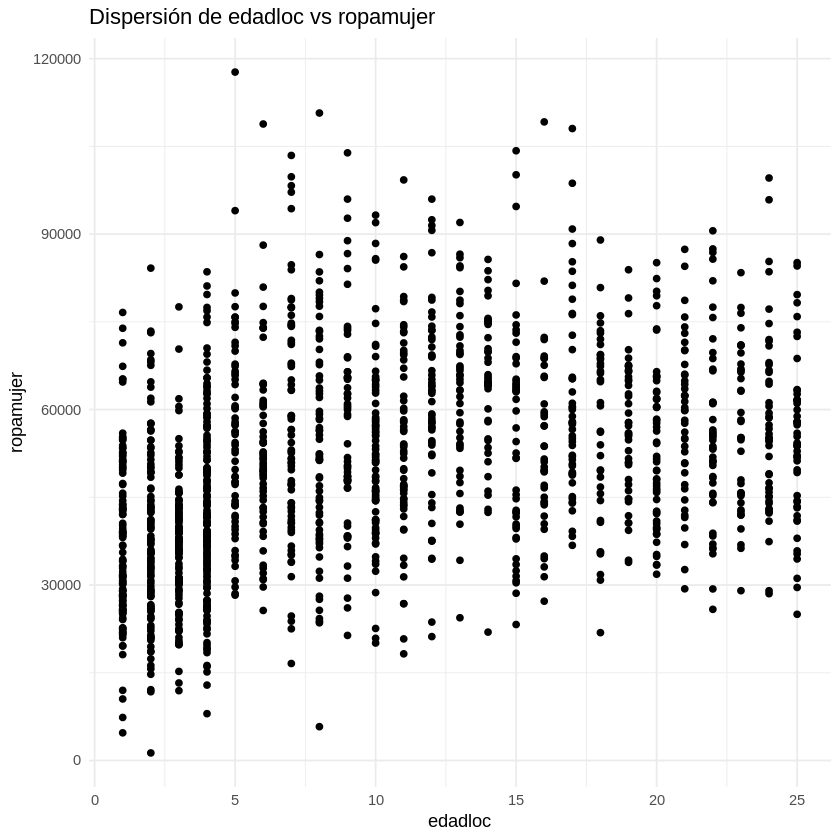

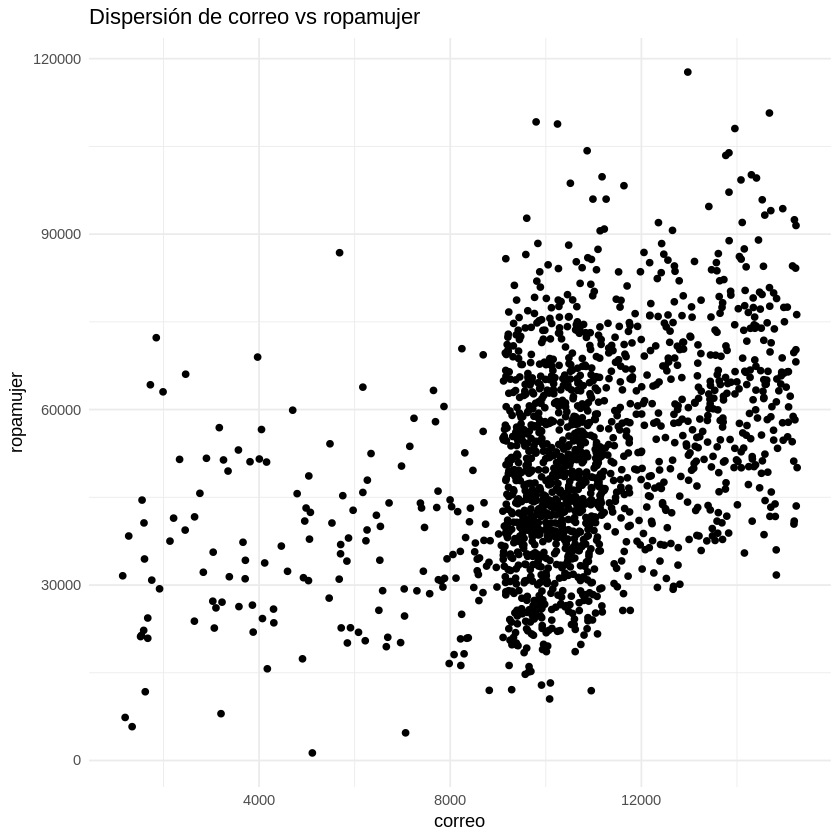

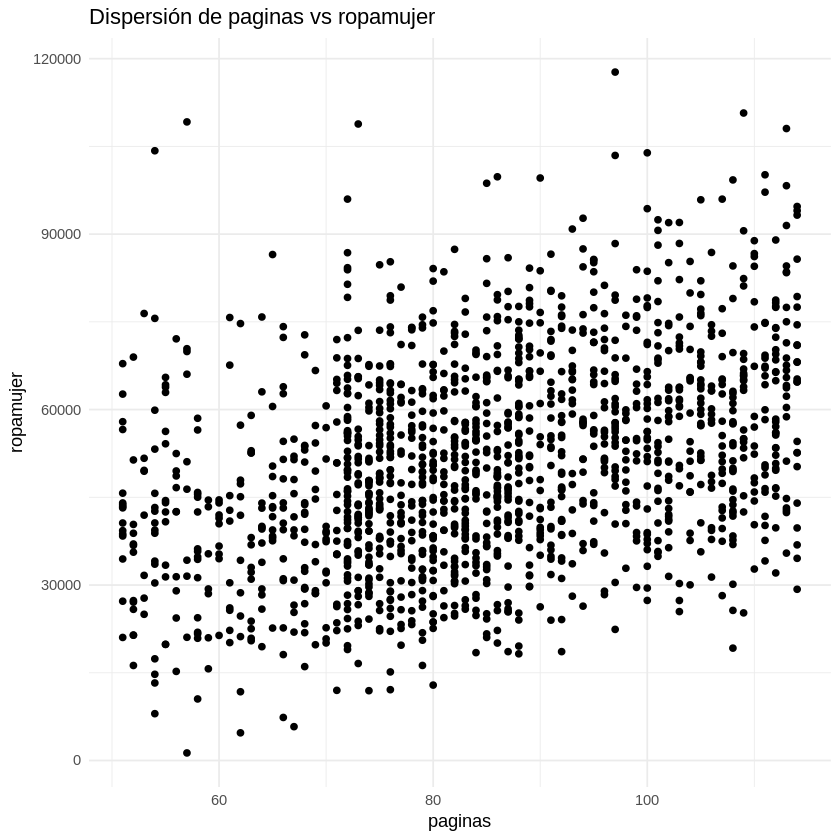

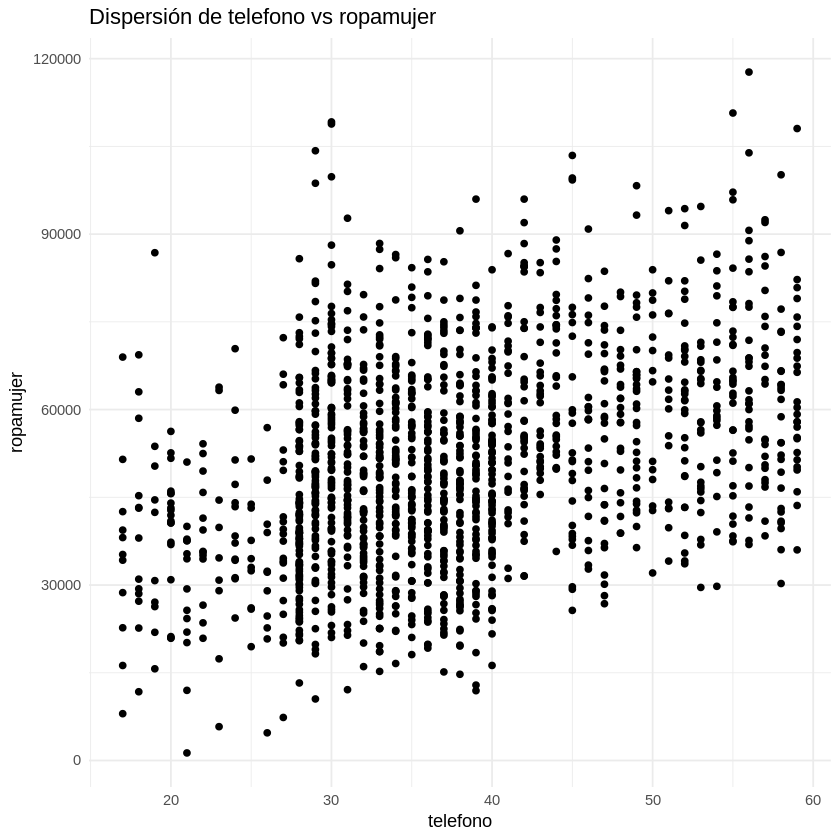

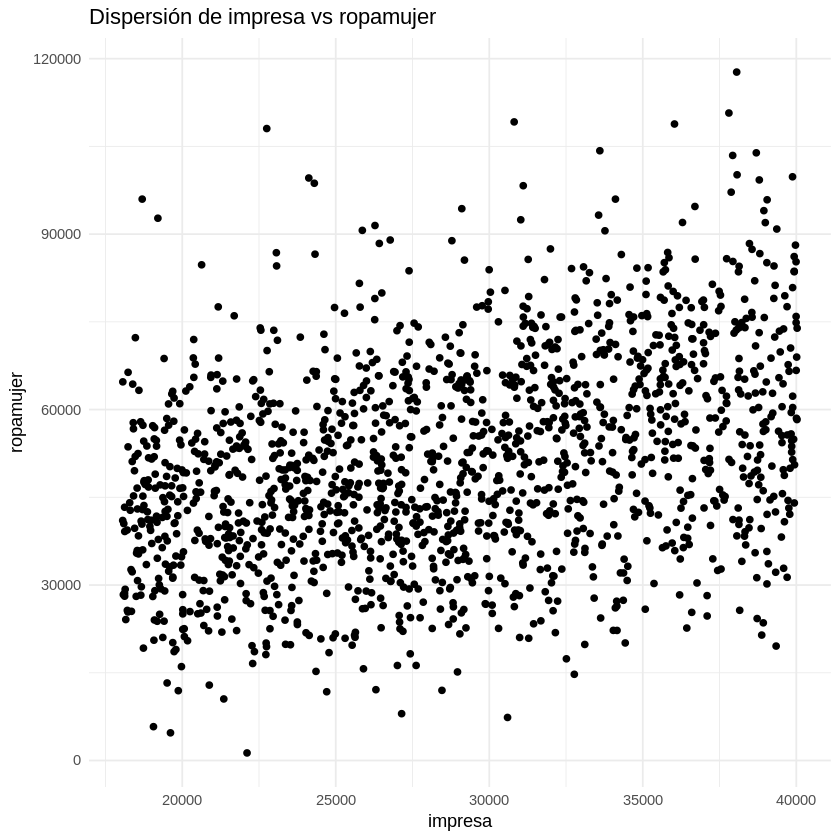

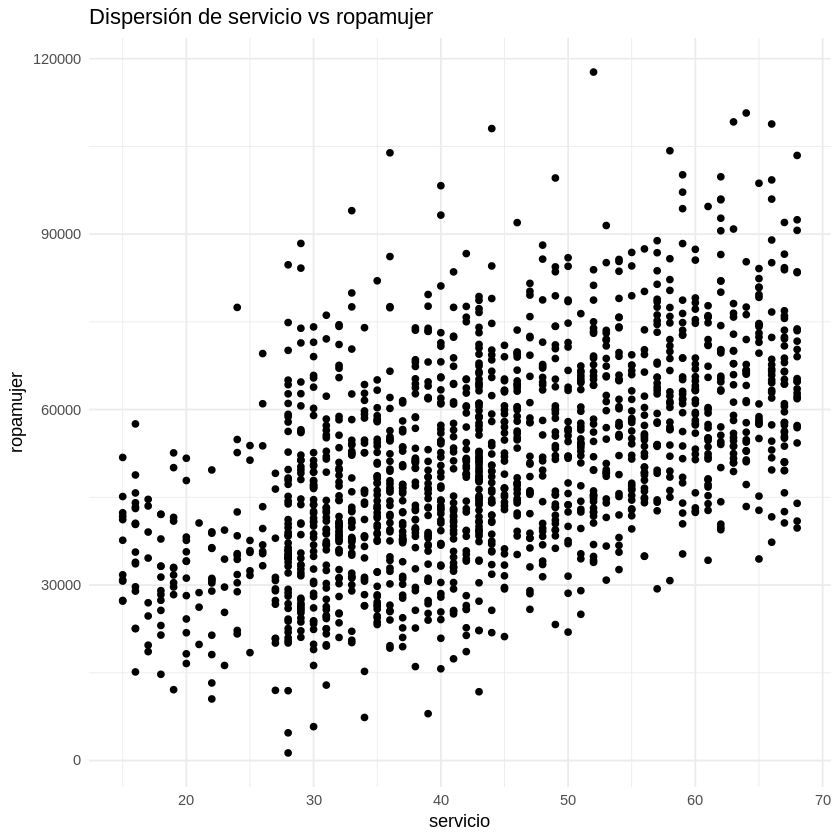

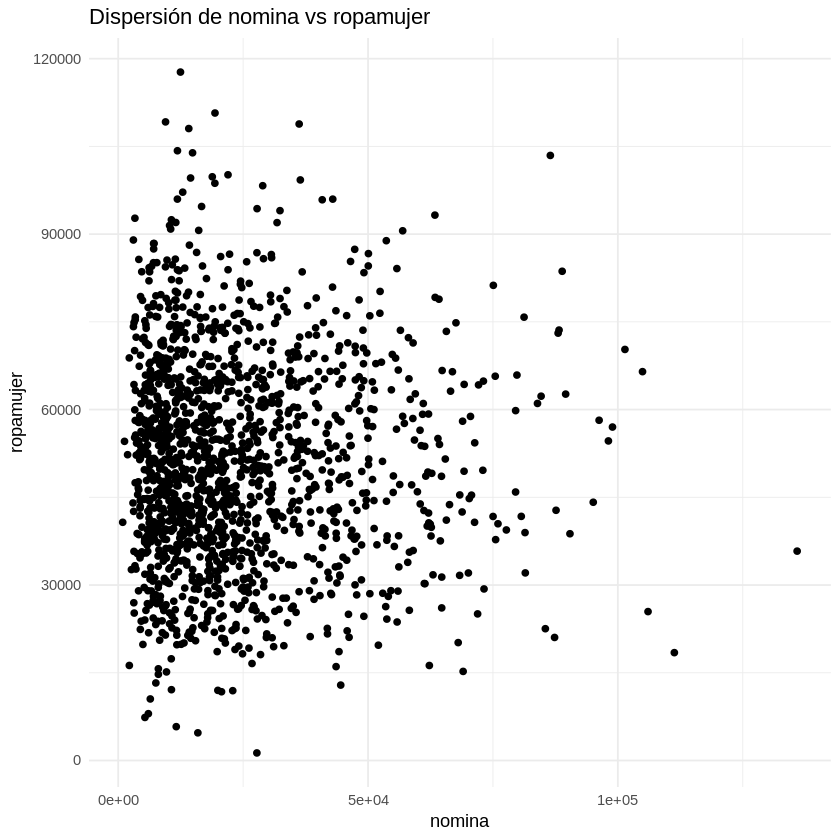

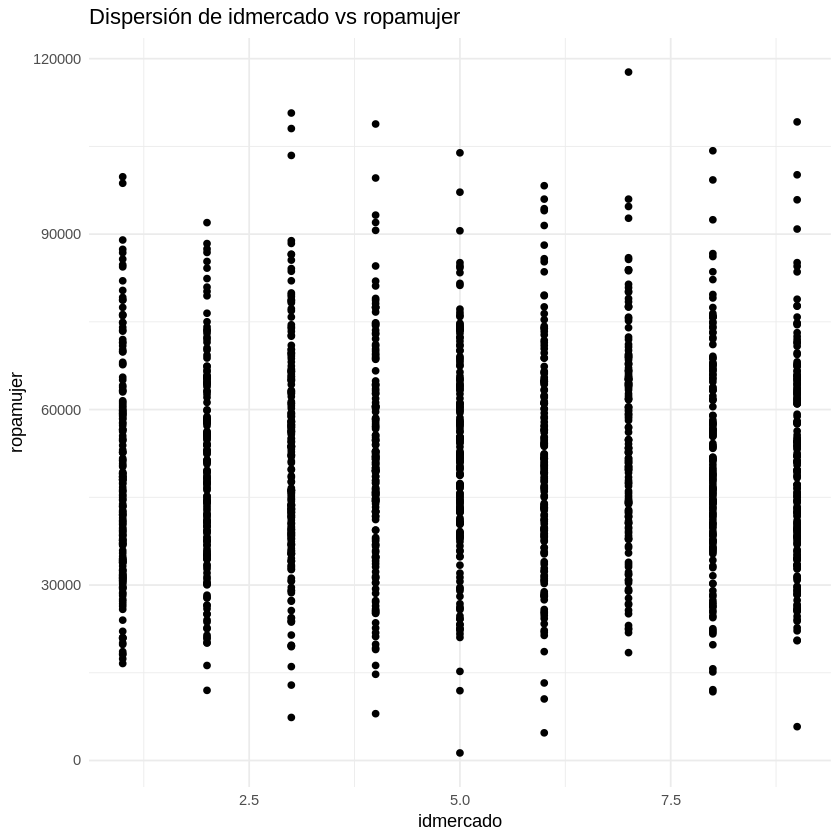

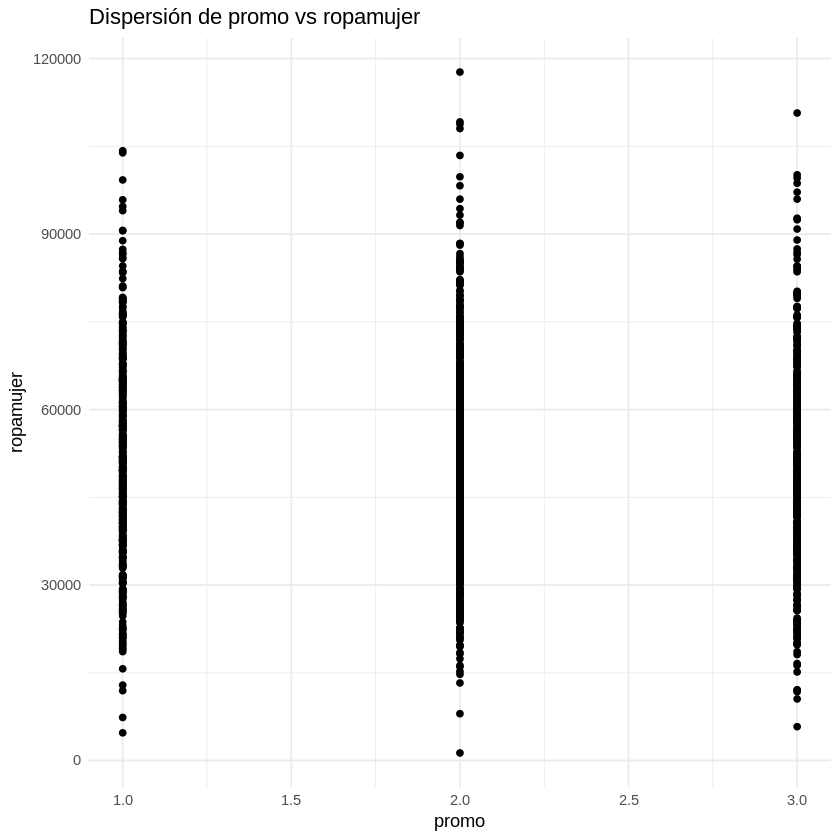

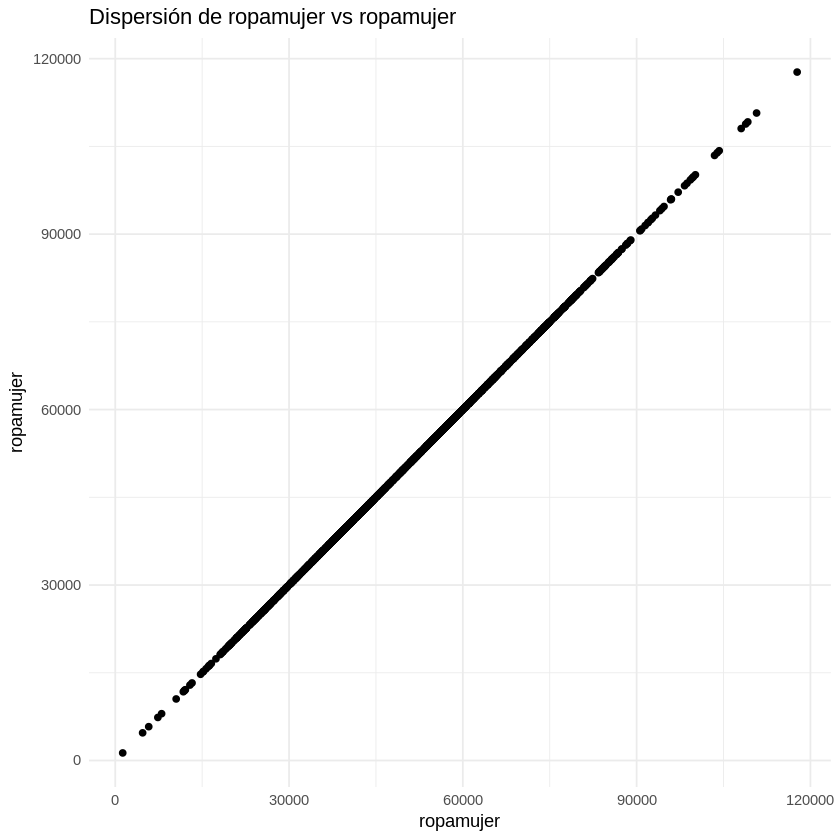

In [ ]:
library(ggplot2)

# Asegúrate de que la primera columna y al menos otra columna sean numéricas
if (is.numeric(regtecnica[[1]])) {
  for (i in 2:ncol(regtecnica)) {
    if (is.numeric(regtecnica[[i]])) {
      p <- ggplot(regtecnica, aes(x = .data[[names(regtecnica)[i]]], y = .data[[names(regtecnica)[12]]])) +
        geom_point() +
        labs(title = paste("Dispersión de", names(regtecnica)[i], "vs", names(regtecnica)[12]),
             x = names(regtecnica)[i],
             y = names(regtecnica)[12]) +
        theme_minimal()
      print(p)
    }
  }
} else {
  print("La primera columna no es numérica, no se pueden generar los gráficos.")
}

#Feature Engineering

In [ ]:
edad_cuadrado=-(edadloc - 10.469375)^2 + 50978.380813
edad_cuadrado1=(edadloc)^2
edad_logaritmica <- log(edadloc)+50978.380813
edad_logaritmica1 <- log(edadloc)


In [ ]:
servicio_logaritmico <-log(servicio)+50978.380813
servicio_logaritmico1 <-log(servicio)
servicio_cuadrado <-(servicio)^2


In [ ]:
impresa_log <-log(impresa)

#Modelado

In [ ]:
attach(train)

The following objects are masked from train (pos = 4):

    correo, edadloc, idloc, idmercado, impresa, nomina, paginas, promo,
    ropamujer, servicio, telefono




In [ ]:
names(train)

[1] "idloc"          "edadloc"        "correo"         "paginas"       
 [5] "telefono"       "impresa"        "servicio"       "nomina"        
 [9] "idmercado"      "promo"          "ropamujer"      "tamamerGrande" 
[13] "tamamerMedian"  "tamamerPequeño"

In [ ]:
summary(train)

     idloc           edadloc          correo         paginas      
 Min.   :   1.0   Min.   : 1.00   Min.   : 1147   Min.   : 51.00  
 1st Qu.: 495.8   1st Qu.: 4.00   1st Qu.: 9644   1st Qu.: 74.00  
 Median : 996.0   Median : 9.00   Median :10480   Median : 84.00  
 Mean   : 995.5   Mean   :10.47   Mean   :10599   Mean   : 85.04  
 3rd Qu.:1495.2   3rd Qu.:17.00   3rd Qu.:11764   3rd Qu.: 98.00  
 Max.   :1998.0   Max.   :25.00   Max.   :15259   Max.   :114.00  
    telefono        impresa         servicio         nomina      
 Min.   :17.00   Min.   :18061   Min.   :15.00   Min.   :   901  
 1st Qu.:30.00   1st Qu.:23562   1st Qu.:33.00   1st Qu.: 10680  
 Median :36.00   Median :28735   Median :43.00   Median : 18886  
 Mean   :37.64   Mean   :28835   Mean   :43.65   Mean   : 24104  
 3rd Qu.:43.00   3rd Qu.:34023   3rd Qu.:54.00   3rd Qu.: 31637  
 Max.   :59.00   Max.   :40028   Max.   :68.00   Max.   :135882  
   idmercado         promo         ropamujer     
 Min.   :1.000   Mi

In [ ]:
m0 <- lm(ropamujer ~ edadloc+correo+paginas+telefono+impresa+servicio+nomina+idmercado+promo+tamamerGrande+tamamerMedian+tamamerPequeño)

In [ ]:
summary(m0)


Call:
lm(formula = ropamujer ~ edadloc + correo + paginas + telefono + 
    impresa + servicio + nomina + idmercado + promo + tamamerGrande + 
    tamamerMedian + tamamerPequeño)

Residuals:
   Min     1Q Median     3Q    Max 
-31751  -7832   -737   6922  55429 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -4.407e+04  2.599e+03 -16.956  < 2e-16 ***
edadloc         4.931e+00  5.029e+01   0.098   0.9219    
correo          1.864e+00  1.910e-01   9.761  < 2e-16 ***
paginas         1.797e+02  2.504e+01   7.176 1.09e-12 ***
telefono        8.121e+01  4.710e+01   1.724   0.0849 .  
impresa         9.352e-01  4.582e-02  20.408  < 2e-16 ***
servicio        6.765e+02  2.808e+01  24.086  < 2e-16 ***
nomina         -1.167e-02  2.321e-02  -0.503   0.6151    
idmercado      -5.096e+00  1.104e+02  -0.046   0.9632    
promo           3.052e+02  4.422e+02   0.690   0.4901    
tamamerGrande   3.290e+02  1.088e+03   0.3

In [ ]:
confint(m0, level=0.95)

,2.5 %,97.5 %
(Intercept),-4.916717e+04,-3.897158e+04
edadloc,-9.370988e+01,1.035729e+02
correo,1.489538e+00,2.238750e+00
paginas,1.306010e+02,2.288465e+02
telefono,-1.118277e+01,1.736037e+02
impresa,8.452718e-01,1.025031e+00
servicio,6.213680e+02,7.315429e+02
nomina,-5.720148e-02,3.385699e-02
idmercado,-2.215477e+02,2.113556e+02
promo,-5.621033e+02,1.172574e+03


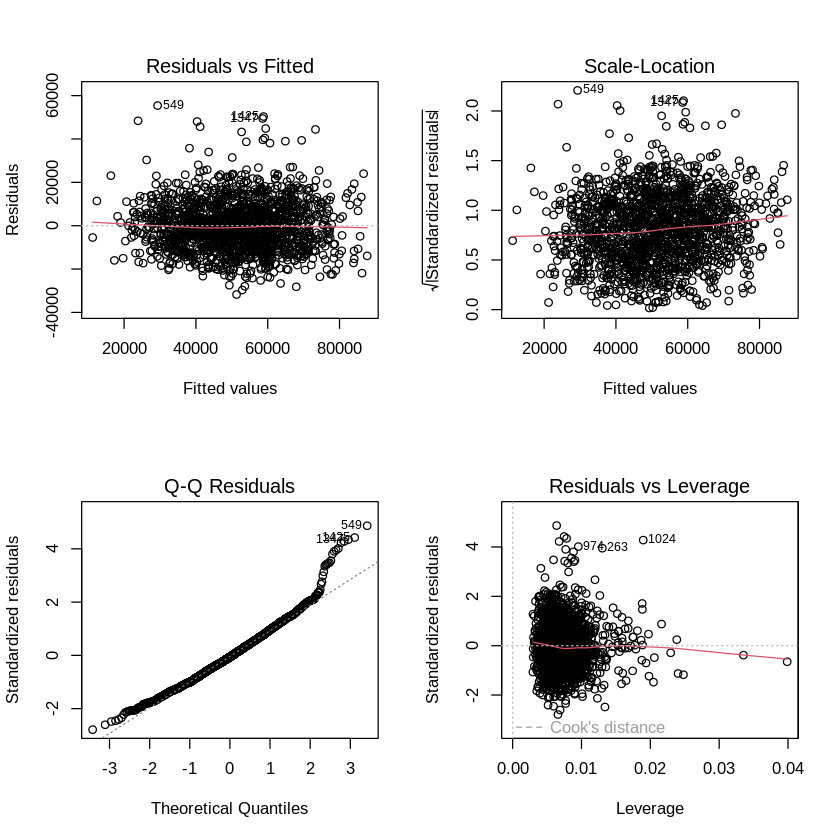

In [ ]:
layout(matrix(c(1,2,3,4),2,2))
plot(m0)

In [ ]:
m1 <- lm(ropamujer ~ edadloc+correo+paginas+telefono+impresa+servicio+nomina+idmercado+promo+edad_cuadrado+edad_cuadrado1+edad_logaritmica+servicio_logaritmico1+servicio_logaritmico+servicio_logaritmico1+servicio_cuadrado+impresa_log+tamamerGrande+tamamerMedian+tamamerPequeño)

In [ ]:
summary(m1)


Call:
lm(formula = ropamujer ~ edadloc + correo + paginas + telefono + 
    impresa + servicio + nomina + idmercado + promo + edad_cuadrado + 
    edad_cuadrado1 + edad_logaritmica + servicio_logaritmico1 + 
    servicio_logaritmico + servicio_logaritmico1 + servicio_cuadrado + 
    impresa_log + tamamerGrande + tamamerMedian + tamamerPequeño)

Residuals:
   Min     1Q Median     3Q    Max 
-32463  -7471   -322   6824  52157 

Coefficients: (3 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.215e+08  7.800e+07  -2.839  0.00458 ** 
edadloc               -2.524e+02  2.254e+02  -1.120  0.26283    
correo                 1.904e+00  1.807e-01  10.539  < 2e-16 ***
paginas                1.739e+02  2.370e+01   7.336  3.5e-13 ***
telefono               9.341e+01  4.459e+01   2.095  0.03633 *  
impresa                6.894e-01  4.170e-01   1.653  0.09850 .  
servicio               1.981e+03  8.964e+02   2.210  0.027

In [ ]:
confint(m1, level=0.95)

,2.5 %,97.5 %
(Intercept),-3.744446e+08,-6.847312e+07
edadloc,-6.944838e+02,1.896056e+02
correo,1.549822e+00,2.258648e+00
paginas,1.273936e+02,2.203830e+02
telefono,5.952922e+00,1.808767e+02
impresa,-1.285694e-01,1.507380e+00
servicio,2.224840e+02,3.738903e+03
nomina,-4.770572e-02,3.857330e-02
idmercado,-1.548365e+02,2.561587e+02
promo,-7.738795e+02,8.704886e+02


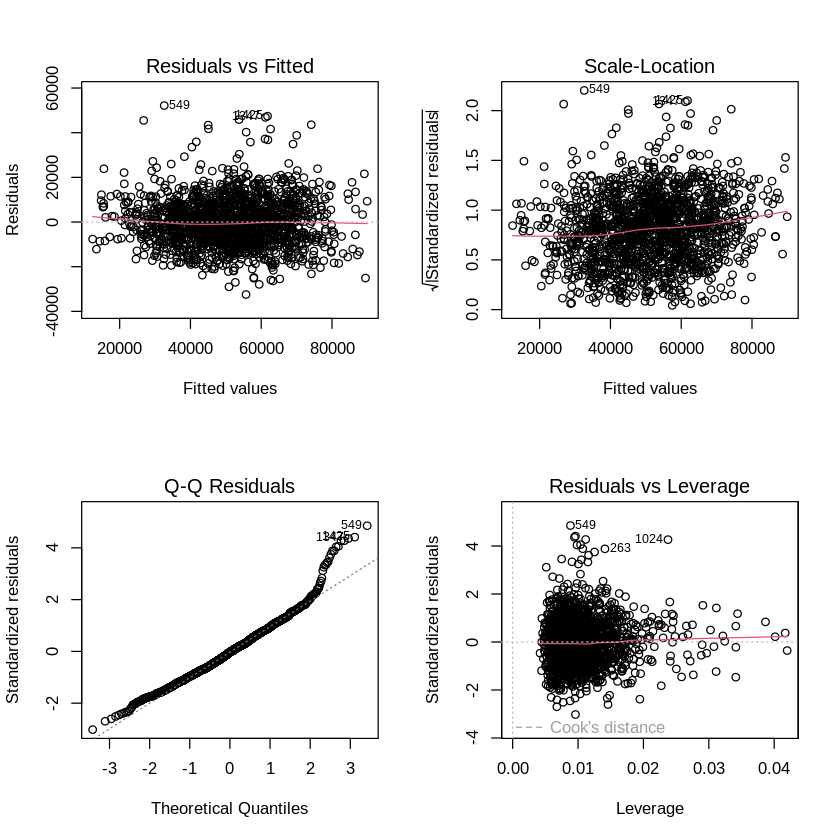

In [ ]:
layout(matrix(c(1,2,3,4),2,2))
plot(m1)

In [ ]:
dwtest(m0)
dwtest(m1)


	Durbin-Watson test

data:  m0
DW = 2.0169, p-value = 0.7615
alternative hypothesis: true autocorrelation is greater than 0



	Durbin-Watson test

data:  m1
DW = 2.0107, p-value = 0.7605
alternative hypothesis: true autocorrelation is greater than 0


Parece no haber correlaciones en los patrones de los residuos ✌

In [ ]:
modelostep<- step(m0,direction="both")

Start:  AIC=29910.57
ropamujer ~ edadloc + correo + paginas + telefono + impresa + 
    servicio + nomina + idmercado + promo + tamamerGrande + tamamerMedian + 
    tamamerPequeño


Step:  AIC=29910.57
ropamujer ~ edadloc + correo + paginas + telefono + impresa + 
    servicio + nomina + idmercado + promo + tamamerGrande + tamamerMedian

                Df  Sum of Sq        RSS   AIC
- tamamerMedian  1 1.2785e+04 2.0718e+11 29909
- idmercado      1 2.7823e+05 2.0718e+11 29909
- edadloc        1 1.2546e+06 2.0718e+11 29909
- tamamerGrande  1 1.1920e+07 2.0719e+11 29909
- nomina         1 3.2990e+07 2.0721e+11 29909
- promo          1 6.2166e+07 2.0724e+11 29909
<none>                        2.0718e+11 29911
- telefono       1 3.8780e+08 2.0757e+11 29912
- paginas        1 6.7190e+09 2.1390e+11 29960
- correo         1 1.2430e+10 2.1961e+11 30002
- impresa        1 5.4338e+10 2.6152e+11 30281
- servicio       1 7.5689e+10 2.8287e+11 30407

Step:  AIC=29908.57
ropamujer ~ edadloc + correo

In [ ]:
modelostep <- lm(ropamujer ~ correo + paginas + telefono + impresa + servicio)

In [ ]:
summary(modelostep)


Call:
lm(formula = ropamujer ~ correo + paginas + telefono + impresa + 
    servicio)

Residuals:
   Min     1Q Median     3Q    Max 
-32193  -7912   -697   6991  55506 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.363e+04  2.206e+03 -19.776  < 2e-16 ***
correo       1.864e+00  1.906e-01   9.781  < 2e-16 ***
paginas      1.790e+02  2.495e+01   7.173 1.12e-12 ***
telefono     8.126e+01  4.698e+01   1.730   0.0839 .  
impresa      9.360e-01  4.572e-02  20.471  < 2e-16 ***
servicio     6.777e+02  2.157e+01  31.417  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11400 on 1594 degrees of freedom
Multiple R-squared:  0.5794,	Adjusted R-squared:  0.5781 
F-statistic: 439.2 on 5 and 1594 DF,  p-value: < 2.2e-16


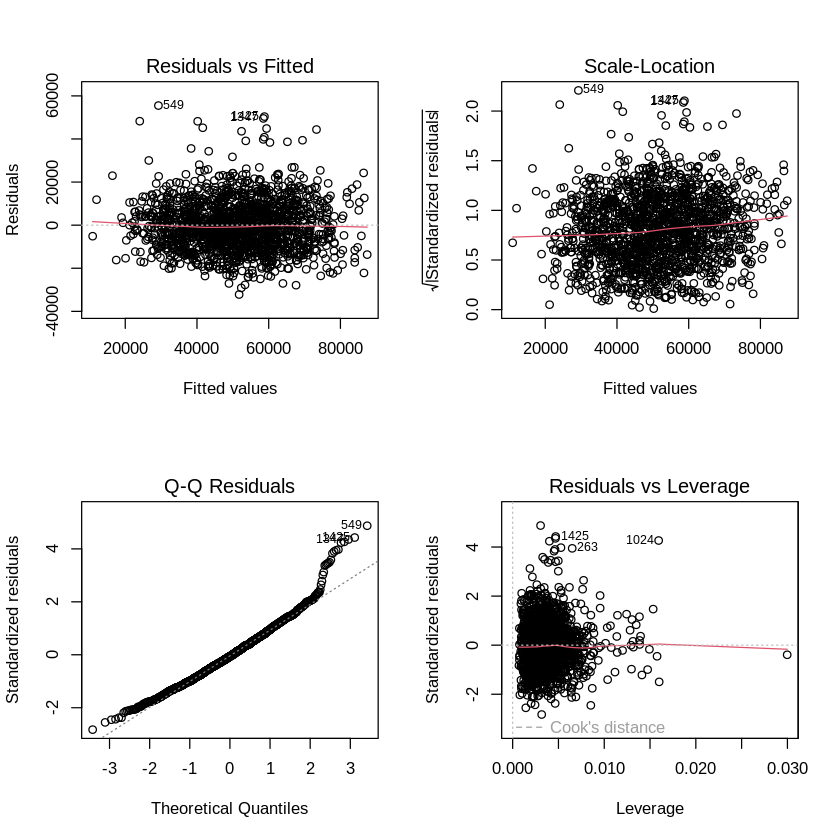

In [ ]:
layout(matrix(c(1,2,3,4),2,2))
plot(modelostep)

In [ ]:
modelostep1<- step(m1,direction="both")

Start:  AIC=29730.94
ropamujer ~ edadloc + correo + paginas + telefono + impresa + 
    servicio + nomina + idmercado + promo + edad_cuadrado + edad_cuadrado1 + 
    edad_logaritmica + servicio_logaritmico1 + servicio_logaritmico + 
    servicio_logaritmico1 + servicio_cuadrado + impresa_log


Step:  AIC=29730.94
ropamujer ~ edadloc + correo + paginas + telefono + impresa + 
    servicio + nomina + idmercado + promo + edad_cuadrado + edad_cuadrado1 + 
    edad_logaritmica + servicio_logaritmico1 + servicio_cuadrado + 
    impresa_log


Step:  AIC=29730.94
ropamujer ~ edadloc + correo + paginas + telefono + impresa + 
    servicio + nomina + idmercado + promo + edad_cuadrado + edad_logaritmica + 
    servicio_logaritmico1 + servicio_cuadrado + impresa_log

                        Df  Sum of Sq        RSS   AIC
- promo                  1 5.9550e+06 1.8449e+11 29729
- idmercado              1 2.9742e+07 1.8452e+11 29729
- impresa_log            1 3.6535e+07 1.8452e+11 29729
- nomina      

In [ ]:
modelostep1 <- lm(ropamujer ~ correo + paginas + telefono + impresa + servicio +
    edad_cuadrado + edad_logaritmica + servicio_logaritmico1)

In [ ]:
summary(modelostep1)


Call:
lm(formula = ropamujer ~ correo + paginas + telefono + impresa + 
    servicio + edad_cuadrado + edad_logaritmica + servicio_logaritmico1)

Residuals:
   Min     1Q Median     3Q    Max 
-32392  -7393   -369   6927  51769 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -1.403e+08  1.900e+07  -7.381 2.51e-13 ***
correo                 1.909e+00  1.802e-01  10.589  < 2e-16 ***
paginas                1.716e+02  2.360e+01   7.272 5.54e-13 ***
telefono               9.646e+01  4.444e+01   2.170   0.0301 *  
impresa                9.303e-01  4.324e-02  21.516  < 2e-16 ***
servicio               8.533e+02  1.034e+02   8.252 3.24e-16 ***
edad_cuadrado          6.401e+01  5.226e+00  12.248  < 2e-16 ***
edad_logaritmica       2.687e+03  3.724e+02   7.216 8.26e-13 ***
servicio_logaritmico1 -1.006e+04  4.048e+03  -2.484   0.0131 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10780 on 159

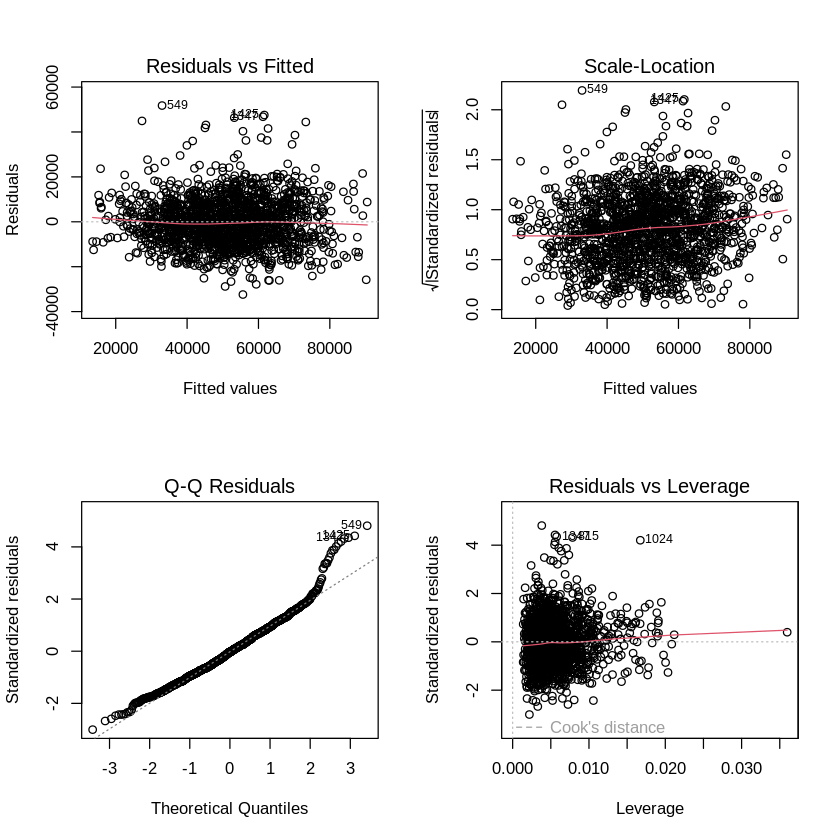

In [ ]:
layout(matrix(c(1,2,3,4),2,2))
plot(modelostep1)

#Primera evaluacion de modelos

In [ ]:
test

idloc,edadloc,correo,paginas,telefono,impresa,servicio,nomina,idmercado,tamamer,promo,ropamujer
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
22,3,9115,65,30,26496.36,27,21936,2,Grande,3,NA
14,18,8438,82,35,20911.52,22,25542,1,Grande,2,NA
91,5,11890,92,50,24474.30,53,18591,9,Grande,1,NA
32,20,9003,54,27,33446.10,26,23028,2,Grande,3,NA
28,8,9152,91,24,27234.64,22,20214,2,Grande,3,NA
109,15,8697,88,34,25929.75,26,23192,2,Grande,1,NA
46,11,9731,80,33,29018.32,33,21827,4,Pequeño,1,NA
82,11,11096,87,43,31720.31,36,17425,8,Median,2,NA
55,7,10078,66,27,31539.69,37,19664,5,Grande,2,NA


In [ ]:
AIC_full<-AIC(m0)
AIC_feature<-AIC(m1)
AIC_step<-AIC(modelostep)
AIC_step1<-AIC(modelostep1)
AIC_compara<-as.data.frame(rbind(AIC_full,AIC_feature,AIC_step,AIC_step1))
AIC_compara

,V1
,<dbl>
AIC_full,34453.17
AIC_feature,34277.44
AIC_step,34442.26
AIC_step1,34265.43


In [ ]:
# Feature Engineerting en test
test$edad_cuadrado <- -(test$edadloc - 10.469375)^2 + 50978.380813
test$edad_cuadrado1 <- (test$edadloc)^2
test$edad_logaritmica <- log(test$edadloc) + 50978.380813
test$edad_logaritmica1 <- log(test$edadloc)

test$servicio_logaritmico <- log(test$servicio) + 50978.380813
test$servicio_logaritmico1 <- log(test$servicio)
test$servicio_cuadrado <- (test$servicio)^2

test$impresa_log <- log(test$impresa)

In [ ]:
if ("tamamer" %in% colnames(test) && any(!is.na(test$tamamer))) {
  test$tamamer <- as.factor(test$tamamer)
  dummy_tamamer_test <- model.matrix(~ tamamer - 1, data = test)
  test <- cbind(test, dummy_tamamer_test)
  head(test) # Show updated test
} else {
  print("La columna 'tamamer' no existe o contiene solo valores NA en test. No se puede convertir a factor.")
}

,idloc,edadloc,correo,paginas,telefono,impresa,servicio,nomina,idmercado,tamamer,⋯,edad_cuadrado1,edad_logaritmica,edad_logaritmica1,servicio_logaritmico,servicio_logaritmico1,servicio_cuadrado,impresa_log,tamamerGrande,tamamerMedian,tamamerPequeño
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,22,3,9115,65,30,26496.36,27,21936,2,Grande,⋯,9,50979.48,1.098612,50981.68,3.295837,729,10.184763,1,0,0
2,14,18,8438,82,35,20911.52,22,25542,1,Grande,⋯,324,50981.27,2.890372,50981.47,3.091042,484,9.948055,1,0,0
3,91,5,11890,92,50,24474.30,53,18591,9,Grande,⋯,25,50979.99,1.609438,50982.35,3.970292,2809,10.105379,1,0,0
4,32,20,9003,54,27,33446.10,26,23028,2,Grande,⋯,400,50981.38,2.995732,50981.64,3.258097,676,10.417690,1,0,0
5,28,8,9152,91,24,27234.64,22,20214,2,Grande,⋯,64,50980.46,2.079442,50981.47,3.091042,484,10.212245,1,0,0
6,109,15,8697,88,34,25929.75,26,23192,2,Grande,⋯,225,50981.09,2.708050,50981.64,3.258097,676,10.163146,1,0,0


In [ ]:
#PREDICCIONES
#hacer predicciones
pred0<-predict(m0, test, se.fit=TRUE)

pred1<-predict(m1, test, se.fit=TRUE)

predStep0<-predict(modelostep, test, se.fit=TRUE)

predStep1<-predict(modelostep1, test, se.fit=TRUE)

RMSE_full<-sqrt(mean((pred0$fit-test$ropamujer)^2))
RMSE_feature<-sqrt(mean((pred1$fit-test$ropamujer)^2))
RMSE_step<-sqrt(mean((predStep0$fit-test$ropamujer)^2))
RMSE_step1<-sqrt(mean((predStep1$fit-test$ropamujer)^2))

RMSE_compara<-as.data.frame(rbind(RMSE_full,RMSE_feature,RMSE_step,RMSE_step1))
RMSE_compara

,V1
,<dbl>
RMSE_full,22235.58
RMSE_feature,22677.66
RMSE_step,22231.67
RMSE_step1,22710.38


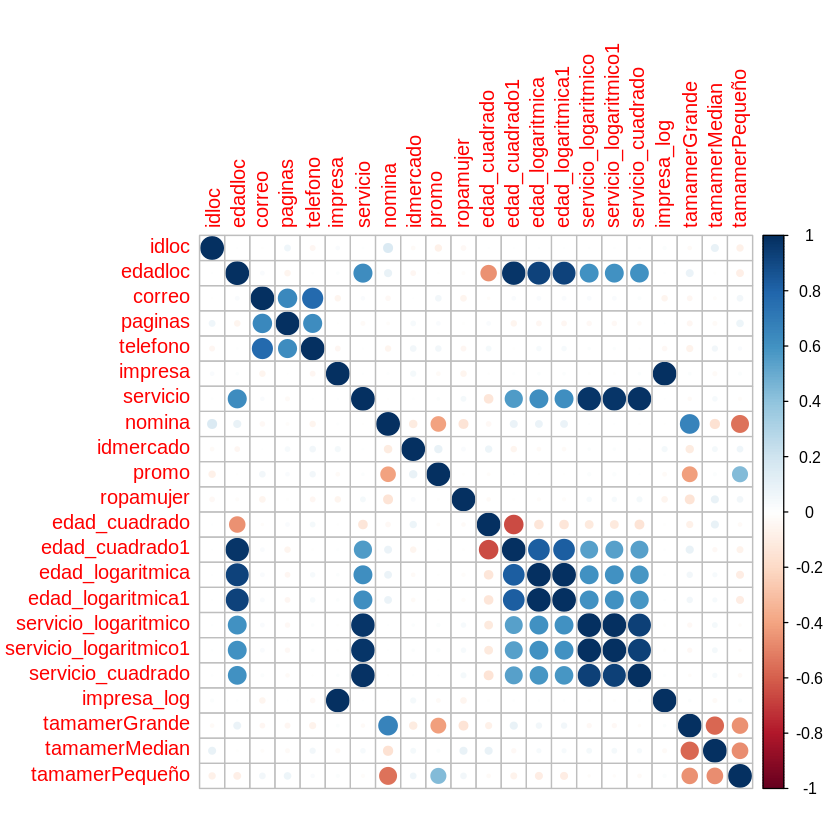

In [ ]:
columnas_numericas1 <- names(test)[sapply(test, is.numeric)]
test_matrizcor <- cor(test[, columnas_numericas1])
corrplot(test_matrizcor)

#Analisis sobre interacciones

In [ ]:
regtecnica$marketing <- regtecnica$correo * regtecnica$paginas * regtecnica$telefono

# Creating other combination variables (examples)
regtecnica$correo_paginas <- regtecnica$correo * regtecnica$paginas
regtecnica$paginas_telefono <- regtecnica$paginas * regtecnica$telefono
regtecnica$correo_telefono <- regtecnica$correo * regtecnica$telefono

# Creating servicio_edadloc variable
regtecnica$servicio_edadloc <- regtecnica$servicio * regtecnica$edadloc

# Replicate the same variable creations for the test dataset
test$marketing <- test$correo * test$paginas * test$telefono
test$correo_paginas <- test$correo * test$paginas
test$paginas_telefono <- test$paginas * test$telefono
test$correo_telefono <- test$correo * test$telefono
test$servicio_edadloc <- test$servicio * test$edadloc

In [ ]:
attach(regtecnica)

The following objects are masked from train (pos = 3):

    correo, edadloc, idloc, idmercado, impresa, nomina, paginas, promo,
    ropamujer, servicio, tamamerGrande, tamamerMedian, tamamerPequeño,
    telefono


The following objects are masked from train (pos = 5):

    correo, edadloc, idloc, idmercado, impresa, nomina, paginas, promo,
    ropamujer, servicio, telefono




In [ ]:
m2 <- lm(ropamujer ~ edadloc+correo+paginas+telefono+impresa+servicio+nomina+idmercado+promo+tamamerGrande+tamamerMedian+tamamerPequeño+marketing+correo_paginas+correo_telefono+servicio_edadloc)

In [ ]:
modelostep<- step(m2,direction="both")

Start:  AIC=29857.35
ropamujer ~ edadloc + correo + paginas + telefono + impresa + 
    servicio + nomina + idmercado + promo + tamamerGrande + tamamerMedian + 
    tamamerPequeño + marketing + correo_paginas + correo_telefono + 
    servicio_edadloc


Step:  AIC=29857.35
ropamujer ~ edadloc + correo + paginas + telefono + impresa + 
    servicio + nomina + idmercado + promo + tamamerGrande + tamamerMedian + 
    marketing + correo_paginas + correo_telefono + servicio_edadloc

                   Df  Sum of Sq        RSS   AIC
- tamamerGrande     1 1.0519e+06 1.9941e+11 29855
- paginas           1 1.2068e+06 1.9941e+11 29855
- correo_paginas    1 1.6877e+06 1.9941e+11 29855
- promo             1 5.4028e+06 1.9941e+11 29855
- idmercado         1 1.7250e+07 1.9942e+11 29856
- tamamerMedian     1 1.9147e+07 1.9942e+11 29856
- telefono          1 3.7533e+07 1.9944e+11 29856
- nomina            1 3.9112e+07 1.9944e+11 29856
<none>                           1.9940e+11 29857
- correo_telefono 

In [ ]:
m2Step <- lm(ropamujer ~ edadloc + correo + impresa + servicio + marketing +
    correo_telefono + servicio_edadloc)

In [ ]:
summary(m2Step)


Call:
lm(formula = ropamujer ~ edadloc + correo + impresa + servicio + 
    marketing + correo_telefono + servicio_edadloc)

Residuals:
   Min     1Q Median     3Q    Max 
-30381  -7722   -939   6991  54725 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -3.862e+04  2.680e+03 -14.412  < 2e-16 ***
edadloc           1.274e+03  1.815e+02   7.021 3.25e-12 ***
correo            2.155e+00  2.610e-01   8.256 3.12e-16 ***
impresa           9.248e-01  4.493e-02  20.583  < 2e-16 ***
servicio          9.075e+02  4.251e+01  21.345  < 2e-16 ***
marketing         4.209e-04  5.646e-05   7.454 1.48e-13 ***
correo_telefono  -3.556e-02  7.779e-03  -4.571 5.22e-06 ***
servicio_edadloc -2.656e+01  3.661e+00  -7.255 6.23e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11200 on 1592 degrees of freedom
Multiple R-squared:  0.595,	Adjusted R-squared:  0.5933 
F-statistic: 334.2 on 7 and 1592 DF,  p-value: < 2.2e

In [ ]:
m3 <- lm(ropamujer ~ edadloc+correo+paginas+telefono+impresa+servicio+nomina+idmercado+promo+edad_cuadrado+edad_cuadrado1+edad_logaritmica+servicio_logaritmico1+servicio_logaritmico+servicio_logaritmico1+servicio_cuadrado+impresa_log+tamamerGrande+tamamerMedian+tamamerPequeño++marketing+correo_paginas+correo_telefono+servicio_edadloc)

In [ ]:
summary(m3)


Call:
lm(formula = ropamujer ~ edadloc + correo + paginas + telefono + 
    impresa + servicio + nomina + idmercado + promo + edad_cuadrado + 
    edad_cuadrado1 + edad_logaritmica + servicio_logaritmico1 + 
    servicio_logaritmico + servicio_logaritmico1 + servicio_cuadrado + 
    impresa_log + tamamerGrande + tamamerMedian + tamamerPequeño + 
    +marketing + correo_paginas + correo_telefono + servicio_edadloc)

Residuals:
   Min     1Q Median     3Q    Max 
-31922  -7598   -564   6797  51832 

Coefficients: (3 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -1.952e+08  7.890e+07  -2.474  0.01346 *  
edadloc                4.748e+02  3.660e+02   1.297  0.19480    
correo                 2.570e+00  1.255e+00   2.048  0.04077 *  
paginas               -4.890e+01  1.301e+02  -0.376  0.70707    
telefono               2.342e+02  2.080e+02   1.126  0.26032    
impresa                6.970e-01  4.151e-01   1.679

In [ ]:
modelostep<- step(m3,direction="both")

Start:  AIC=29721.4
ropamujer ~ edadloc + correo + paginas + telefono + impresa + 
    servicio + nomina + idmercado + promo + edad_cuadrado + edad_cuadrado1 + 
    edad_logaritmica + servicio_logaritmico1 + servicio_logaritmico + 
    servicio_logaritmico1 + servicio_cuadrado + impresa_log + 
    tamamerGrande + tamamerMedian + tamamerPequeño + +marketing + 
    correo_paginas + correo_telefono + servicio_edadloc


Step:  AIC=29721.4
ropamujer ~ edadloc + correo + paginas + telefono + impresa + 
    servicio + nomina + idmercado + promo + edad_cuadrado + edad_cuadrado1 + 
    edad_logaritmica + servicio_logaritmico1 + servicio_logaritmico + 
    servicio_cuadrado + impresa_log + tamamerGrande + tamamerMedian + 
    marketing + correo_paginas + correo_telefono + servicio_edadloc


Step:  AIC=29721.4
ropamujer ~ edadloc + correo + paginas + telefono + impresa + 
    servicio + nomina + idmercado + promo + edad_cuadrado + edad_cuadrado1 + 
    edad_logaritmica + servicio_logaritmico1 + s

In [ ]:
m3step <- lm(ropamujer ~ edadloc + correo + impresa + servicio + edad_cuadrado +
    edad_logaritmica + servicio_logaritmico1 + marketing + correo_telefono +
    servicio_edadloc)

In [ ]:
summary(m3step)


Call:
lm(formula = ropamujer ~ edadloc + correo + impresa + servicio + 
    edad_cuadrado + edad_logaritmica + servicio_logaritmico1 + 
    marketing + correo_telefono + servicio_edadloc)

Residuals:
   Min     1Q Median     3Q    Max 
-31962  -7653   -616   6820  51577 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -1.900e+08  7.796e+07  -2.438 0.014895 *  
edadloc                5.072e+02  3.434e+02   1.477 0.139916    
correo                 2.145e+00  2.499e-01   8.582  < 2e-16 ***
impresa                9.180e-01  4.304e-02  21.330  < 2e-16 ***
servicio               1.241e+03  1.648e+02   7.528 8.58e-14 ***
edad_cuadrado          4.604e+01  1.204e+01   3.826 0.000135 ***
edad_logaritmica       3.682e+03  1.539e+03   2.393 0.016849 *  
servicio_logaritmico1 -1.982e+04  5.136e+03  -3.860 0.000118 ***
marketing              4.226e-04  5.406e-05   7.818 9.69e-15 ***
correo_telefono       -3.489e-02  7.448e-03  -4.685 3.05e-06 *

In [ ]:
predm2 <- predict(m2, test, se.fit = TRUE)  # Prediction for m2
predm2Step <- predict(m2Step, test, se.fit = TRUE)  # Prediction for m2Step
predm3 <- predict(m3, test, se.fit = TRUE)  # Prediction for m3
predm3step <- predict(m3step, test, se.fit = TRUE)  # Prediction for m3Step

RMSE_m2 <- sqrt(mean((predm2$fit - test$ropamujer)^2))  # RMSE for m2
RMSE_m2Step <- sqrt(mean((predm2Step$fit - test$ropamujer)^2))  # RMSE for m2Step
RMSE_m3 <- sqrt(mean((predm3$fit - test$ropamujer)^2))  # RMSE for m3
RMSE_m3Step <- sqrt(mean((predm3step$fit - test$ropamujer)^2))  # RMSE for m3Step



In [ ]:

RMSE_compara<-as.data.frame(rbind(RMSE_m2, RMSE_m2Step,RMSE_m3,RMSE_m3Step))
RMSE_compara


,V1
,<dbl>
RMSE_m2,22366.81
RMSE_m2Step,22381.92
RMSE_m3,22685.36
RMSE_m3Step,22713.76


In [ ]:
RMSE_compara<-as.data.frame(rbind(RMSE_full,RMSE_feature,RMSE_step,RMSE_step1,
                                 RMSE_m2, RMSE_m2Step, RMSE_m3, RMSE_m3Step))

rownames(RMSE_compara) <- c("RMSE_full", "RMSE_feature", "RMSE_step", "RMSE_step1",
                           "RMSE_m2", "RMSE_m2Step", "RMSE_m3", "RMSE_m3Step") # Set row names

RMSE_compara

,V1
,<dbl>
RMSE_full,22235.58
RMSE_feature,22677.66
RMSE_step,22231.67
RMSE_step1,22710.38
RMSE_m2,22366.81
RMSE_m2Step,22381.92
RMSE_m3,22685.36
RMSE_m3Step,22713.76


#Analisis atipicos

In [ ]:
atipicos<-c("187","340","235")
veratipicos<-regtecnica.train[atipicos,]
#obtener su media en todas las variables
atiptc<-apply(veratipicos,2,mean)
#obtener la media general y comparar
todostc<-apply(regtecnica.train,2,mean)
comparar<-as.data.frame(cbind(atiptc,todostc))
comparar

,atiptc,todostc
,<dbl>,<dbl>
ingreso (millones),769.832173,900.863105
gasto publicidad (millones),4.098333,5.586797
competidores,8.000000,5.448622
precio,1600.000000,1988.496241


###Resultados:

In [ ]:
predictions <- predict(m3step, newdata = test)

# Create a dataframe with predictions and corresponding index
predicted_values <- data.frame(Index = 1:length(predictions), Predicted_ropamujer = predictions)

In [ ]:
predicted_values

,Index,Predicted_ropamujer
,<int>,<dbl>
1,1,29525.56
2,2,32227.38
3,3,58259.97
4,4,41716.59
5,5,37969.62
6,6,39354.29
7,7,45504.44
8,8,53661.40
9,9,47018.40


In [ ]:
predictions <- predict(m3step, newdata = test)

# Create a dataframe with predictions and corresponding idloc
predicted_values <- data.frame(idloc = test$idloc, Predicted_ropamujer = predictions)
predicted_values

,idloc,Predicted_ropamujer
,<dbl>,<dbl>
1,22,29525.56
2,14,32227.38
3,91,58259.97
4,32,41716.59
5,28,37969.62
6,109,39354.29
7,46,45504.44
8,82,53661.40
9,55,47018.40


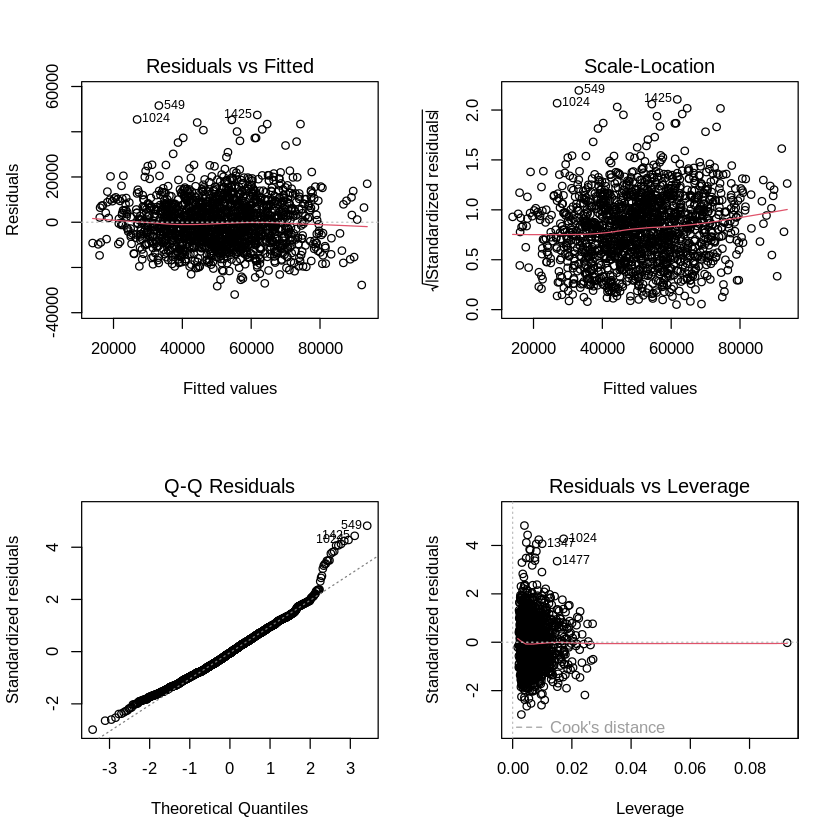

In [ ]:
layout(matrix(c(1,2,3,4),2,2))
plot(m3step)

In [ ]:

if(!require(openxlsx)){install.packages("openxlsx")}

library(openxlsx)

wb <- createWorkbook()

addWorksheet(wb, "Predicted Values")

writeData(wb, "Predicted Values", predicted_values)

saveWorkbook(wb, "resultado.xlsx", overwrite = TRUE)

Loading required package: openxlsx

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘openxlsx’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Al examinar los gráficos de residuos, se observa en el gráfico de "Residuals vs Fitted" una distribución aparentemente aleatoria alrededor de cero, lo que sugiere que el modelo captura la relación lineal de manera adecuada en general. Sin embargo, se percibe una ligera tendencia a una mayor dispersión de los residuos en los valores ajustados más altos, lo que podría indicar una posible heterocedasticidad. El gráfico "Scale-Location" muestra una tendencia similar, con una dispersión creciente a medida que aumentan los valores ajustados. El gráfico "Q-Q Residuals" muestra que los residuos se desvían ligeramente de la línea recta en los extremos, lo que sugiere una posible desviación de la normalidad, especialmente en las colas de la distribución. Finalmente, el gráfico "Residuals vs Leverage" no muestra puntos con una influencia excesiva (alta influencia y residuos grandes) que puedan estar distorsionando significativamente el modelo, aunque algunos puntos tienen un apalancamiento ligeramente mayor.

En conclusión, el modelo final (m3step) demuestra una capacidad predictiva sólida, explicando una proporción considerable de la variabilidad en la variable objetivo gracias a una metodología de modelado bien estructurada. La inclusión de ingeniería de características e interacciones ha enriquecido el modelo, capturando relaciones más complejas. No obstante, el análisis de los residuos revela áreas de posible mejora. La heterocedasticidad potencial y la ligera desviación de la normalidad en los residuos podrían abordarse con transformaciones adicionales o mediante la exploración de modelos más robustos a estas violaciones de los supuestos de regresión lineal. Si bien no se identificaron puntos excesivamente influyentes, es recomendable investigar los casos con mayor apalancamiento. En general, el modelo es prometedor, pero una mayor atención a los supuestos de los residuos podría conducir a una mayor precisión y fiabilidad en las predicciones.